In [23]:
# https://www.kaggle.com/datasets/adarshsng/heart-mri-image-dataset-left-atrial-segmentation

import nibabel as nib
import matplotlib.pyplot as plt
from pathlib import Path
import pandas as pd 
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D, Concatenate, Input
from tensorflow.keras.models import Model
import tensorflow.keras.backend as K
from tensorflow.keras.callbacks import ModelCheckpoint



Inspect the dataset

In [2]:
Example_train_nii_path='imagesTr/la_011.nii'
Example_label_nii_path='labelsTr/la_011.nii'
Example_train_nii = nib.load(Example_train_nii_path)
Example_label_nii = nib.load(Example_label_nii_path)

In [3]:
print(Example_train_nii.shape)  #shape

(320, 320, 120)


In [5]:
a = Example_train_nii.get_fdata()
b = Example_label_nii.get_fdata()
max_area = 0
selected = 0
for j in range(a.shape[2]):
    temp = np.sum(b[:,:,j])
    if temp>max_area:
        max_area = temp
        selected = j

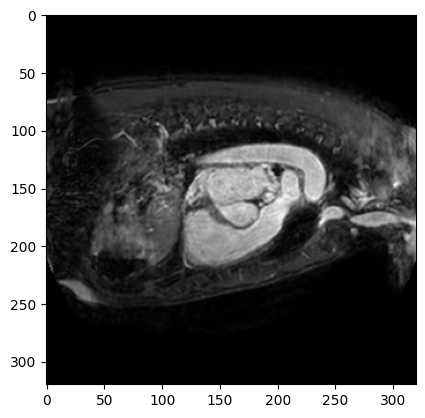

In [6]:
plt.imshow(Example_train_nii.get_fdata()[:,:,selected], cmap = 'gray')  #choose which axis?

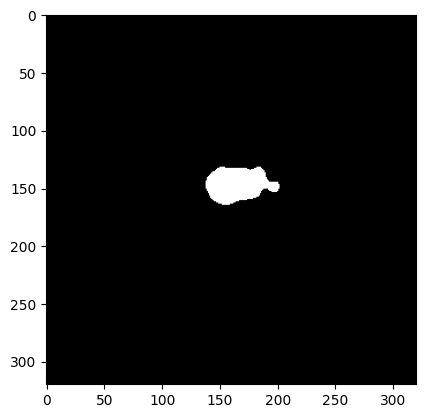

In [7]:
plt.imshow(Example_label_nii.get_fdata()[:,:,selected],cmap='gray')

DataProcess

In [8]:
Main_NII_Path = Path('C:\Dpan\py_project\Heart_Mri_Segmentation\imagesTr')  # it should be the complete path
Label_NII_Path = Path('C:\Dpan\py_project\Heart_Mri_Segmentation\labelsTr')

In [9]:
if Main_NII_Path.exists():
    print(True)

True


In [10]:
NII_Images = list(Main_NII_Path.glob("*.nii"))
NII_labels = list(Label_NII_Path.glob('*nii'))
print(len(NII_Images))
print(len(NII_labels))

20
20


In [11]:
Image_Series = pd.Series(NII_Images, name = 'trainImage').astype(str)
Label_Series = pd.Series(NII_labels, name='label').astype(str)

In [12]:
Main_Data = pd.concat([Image_Series, Label_Series],axis=1)
print(Main_Data['trainImage'])

0     C:\Dpan\py_project\Heart_Mri_Segmentation\imag...
1     C:\Dpan\py_project\Heart_Mri_Segmentation\imag...
2     C:\Dpan\py_project\Heart_Mri_Segmentation\imag...
3     C:\Dpan\py_project\Heart_Mri_Segmentation\imag...
4     C:\Dpan\py_project\Heart_Mri_Segmentation\imag...
5     C:\Dpan\py_project\Heart_Mri_Segmentation\imag...
6     C:\Dpan\py_project\Heart_Mri_Segmentation\imag...
7     C:\Dpan\py_project\Heart_Mri_Segmentation\imag...
8     C:\Dpan\py_project\Heart_Mri_Segmentation\imag...
9     C:\Dpan\py_project\Heart_Mri_Segmentation\imag...
10    C:\Dpan\py_project\Heart_Mri_Segmentation\imag...
11    C:\Dpan\py_project\Heart_Mri_Segmentation\imag...
12    C:\Dpan\py_project\Heart_Mri_Segmentation\imag...
13    C:\Dpan\py_project\Heart_Mri_Segmentation\imag...
14    C:\Dpan\py_project\Heart_Mri_Segmentation\imag...
15    C:\Dpan\py_project\Heart_Mri_Segmentation\imag...
16    C:\Dpan\py_project\Heart_Mri_Segmentation\imag...
17    C:\Dpan\py_project\Heart_Mri_Segmentation\

In [13]:
import cv2
Image_List = []
Label_List = []

for i_image, i_mask in zip(Main_Data['trainImage'].values, Main_Data['label'].values):
    reading_Train_nii = nib.load(i_image)
    reading_Label_nii = nib.load(i_mask)

    X_Images = reading_Train_nii.get_fdata()
    X_Labels = reading_Label_nii.get_fdata()
    
    max_area = 0
    selected = 0
    for j in range(X_Images.shape[2]):
        temp = np.sum(X_Labels[:,:,j])
        if temp>max_area:
            max_area = temp
            selected = j

    Selecting_Image_1 = X_Images[:,:,selected]  #normalization
    Selecting_Label_1 = X_Labels[:,:,selected]
    Selecting_Image_2 = X_Images[:,:,selected-1]  #normalization
    Selecting_Label_2 = X_Labels[:,:,selected-1]
    Selecting_Image_3 = X_Images[:,:,selected+1]  #normalization
    Selecting_Label_3 = X_Labels[:,:,selected+1]


    Selecting_Image_1 = Selecting_Image_1.astype('float32')
    Selecting_Label_1 = Selecting_Label_1.astype('float32')
    Selecting_Image_2 = Selecting_Image_2.astype('float32')
    Selecting_Label_2 = Selecting_Label_2.astype('float32')
    Selecting_Image_3 = Selecting_Image_3.astype('float32')
    Selecting_Label_3 = Selecting_Label_3.astype('float32')
    Image_List.append(cv2.resize(Selecting_Image_1,(128,128)))
    Label_List.append(cv2.resize(Selecting_Label_1,(128,128)))
    Image_List.append(cv2.resize(Selecting_Image_2,(128,128)))
    Label_List.append(cv2.resize(Selecting_Label_2,(128,128)))
    Image_List.append(cv2.resize(Selecting_Image_3,(128,128)))
    Label_List.append(cv2.resize(Selecting_Label_3,(128,128)))


In [14]:
for i in range(len(Image_List)):
    print(Image_List[0].shape)

(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)


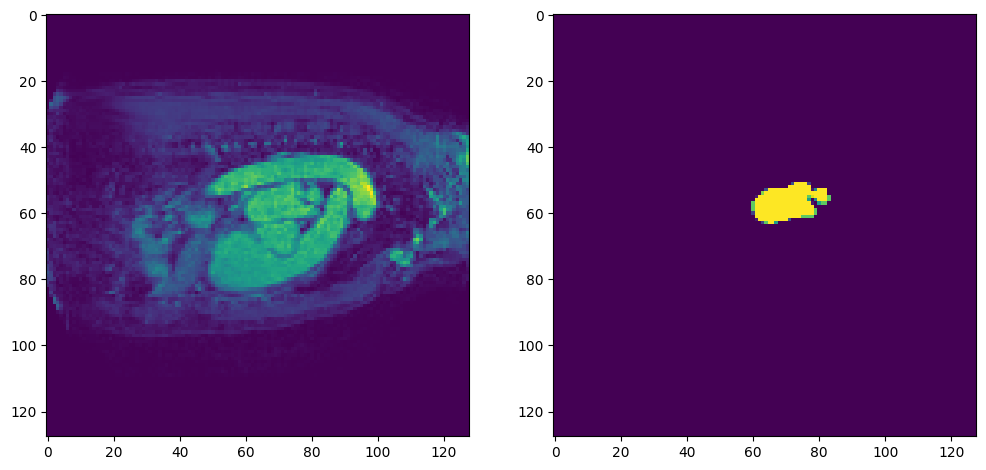

In [15]:
figure,axis = plt.subplots(1,2,figsize=(12,12))
axis[0].imshow(Image_List[0])
axis[1].imshow(Label_List[0])

## Image Preprocessing

In [16]:
def preprocess_image(image):
    # Normalize the image to the range 0-1
    normalized_image = cv2.normalize(image, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
    
    # Convert normalized image to 8-bit (0-255)
    normalized_image_8bit = np.uint8(normalized_image * 255)
    
    # Apply histogram equalization
    equalized_image = cv2.equalizeHist(normalized_image_8bit)
    
    # Enhance details using Laplacian
    enhanced_image = cv2.Laplacian(equalized_image, cv2.CV_64F)
    
    return enhanced_image

In [17]:
X_Train = np.array(Image_List)
X_label = np.array(Label_List)
for i in range(X_Train.shape[0]):
    X_Train[i] = preprocess_image(X_Train[i])
X_Train = X_Train.reshape(X_Train.shape[0],X_Train.shape[1],X_Train.shape[2],1)
X_label = X_label.reshape(X_Train.shape[0],X_Train.shape[1],X_Train.shape[2],1)
print(X_Train.shape)

(60, 128, 128, 1)


## Model

In [18]:
def unet_model(input_size=(128, 128, 1)):
    inputs = Input(input_size)

    # Encoding path
    c1 = Conv2D(64, (3, 3), activation='relu', padding='same')(inputs)
    c1 = Conv2D(64, (3, 3), activation='relu', padding='same')(c1)
    p1 = MaxPooling2D((2, 2))(c1)

    c2 = Conv2D(128, (3, 3), activation='relu', padding='same')(p1)
    c2 = Conv2D(128, (3, 3), activation='relu', padding='same')(c2)
    p2 = MaxPooling2D((2, 2))(c2)

    c3 = Conv2D(256, (3, 3), activation='relu', padding='same')(p2)
    c3 = Conv2D(256, (3, 3), activation='relu', padding='same')(c3)
    p3 = MaxPooling2D((2, 2))(c3)

    c4 = Conv2D(512, (3, 3), activation='relu', padding='same')(p3)
    c4 = Conv2D(512, (3, 3), activation='relu', padding='same')(c4)
    p4 = MaxPooling2D((2, 2))(c4)

    # Bottleneck
    c5 = Conv2D(1024, (3, 3), activation='relu', padding='same')(p4)
    c5 = Conv2D(1024, (3, 3), activation='relu', padding='same')(c5)

    # Decoding path
    u6 = UpSampling2D((2, 2))(c5)
    u6 = Concatenate()([u6, c4])
    c6 = Conv2D(512, (3, 3), activation='relu', padding='same')(u6)
    c6 = Conv2D(512, (3, 3), activation='relu', padding='same')(c6)

    u7 = UpSampling2D((2, 2))(c6)
    u7 = Concatenate()([u7, c3])
    c7 = Conv2D(256, (3, 3), activation='relu', padding='same')(u7)
    c7 = Conv2D(256, (3, 3), activation='relu', padding='same')(c7)

    u8 = UpSampling2D((2, 2))(c7)
    u8 = Concatenate()([u8, c2])
    c8 = Conv2D(128, (3, 3), activation='relu', padding='same')(u8)
    c8 = Conv2D(128, (3, 3), activation='relu', padding='same')(c8)

    u9 = UpSampling2D((2, 2))(c8)
    u9 = Concatenate()([u9, c1])
    c9 = Conv2D(64, (3, 3), activation='relu', padding='same')(u9)
    c9 = Conv2D(64, (3, 3), activation='relu', padding='same')(c9)

    outputs = Conv2D(1, (1, 1), activation='sigmoid')(c9)

    model = Model(inputs=[inputs], outputs=[outputs])

    return model


In [30]:
checkpoint_callback = ModelCheckpoint(
    filepath='best_model.h5',  # Path where the model will be saved
    monitor='val_loss',        # Metric to monitor
    save_best_only=True,       # Only save the best model
    save_weights_only=False,   # Save the full model (not just weights)
    mode='auto',               # Automatically decide to minimize or maximize the monitored metric
    save_freq='epoch',         # Save the model at the end of every epoch
    # verbose=1                  # Print messages when saving the model
)

In [19]:
def dice_coefficient(y_true, y_pred):
    intersection = K.sum(y_true*y_pred)
    return (2.0*intersection+1)/(K.sum(y_true)+K.sum(y_pred)+1)

def dice_loss(y_true, y_pred):
    return 1-dice_coefficient(y_true, y_pred)

In [28]:
from sklearn.model_selection import train_test_split
train_data, val_data, train_labels, val_labels = train_test_split(X_Train, X_label, test_size=0.2, random_state=42)


In [31]:
# Instantiate and compile the model
model = unet_model(input_size=(128, 128, 1))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=[dice_coefficient])  # the kind of loss matters

# Print model summary
# model.summary()

# Train the model
model.fit(X_Train, X_label, epochs=100, batch_size=10,validation_data=(val_data, val_labels),callbacks=[checkpoint_callback])

Epoch 1/100
6/6 [==============================] - 16s 2s/step - loss: 22.6533 - dice_coefficient: 0.0069 - val_loss: 0.4614 - val_dice_coefficient: 0.0010
Epoch 2/100
6/6 [==============================] - 14s 2s/step - loss: 0.2490 - dice_coefficient: 0.0078 - val_loss: 0.1212 - val_dice_coefficient: 0.0081
Epoch 3/100
6/6 [==============================] - 14s 2s/step - loss: 0.1139 - dice_coefficient: 0.0103 - val_loss: 0.0608 - val_dice_coefficient: 0.0398
Epoch 4/100
6/6 [==============================] - 14s 2s/step - loss: 0.0457 - dice_coefficient: 0.0974 - val_loss: 0.0353 - val_dice_coefficient: 0.1857
Epoch 5/100
6/6 [==============================] - 14s 2s/step - loss: 0.0332 - dice_coefficient: 0.1894 - val_loss: 0.0331 - val_dice_coefficient: 0.2085
Epoch 6/100
6/6 [==============================] - 14s 2s/step - loss: 0.0340 - dice_coefficient: 0.1842 - val_loss: 0.0261 - val_dice_coefficient: 0.2725
Epoch 7/100
6/6 [==============================] - 14s 2s/step - loss

In [34]:
X_predict = X_Train[11,:,:,:]
X_predict = X_predict.reshape(1, X_predict.shape[0],X_predict.shape[1], X_predict.shape[2])
with tf.keras.utils.custom_object_scope({'dice_coefficient': dice_coefficient}):
    loaded_model = tf.keras.models.load_model('best_model.h5')
prediction_mask = model.predict(X_predict)
print(prediction_mask.shape)

1/1 [==============================] - 0s 250ms/step
(1, 128, 128, 1)


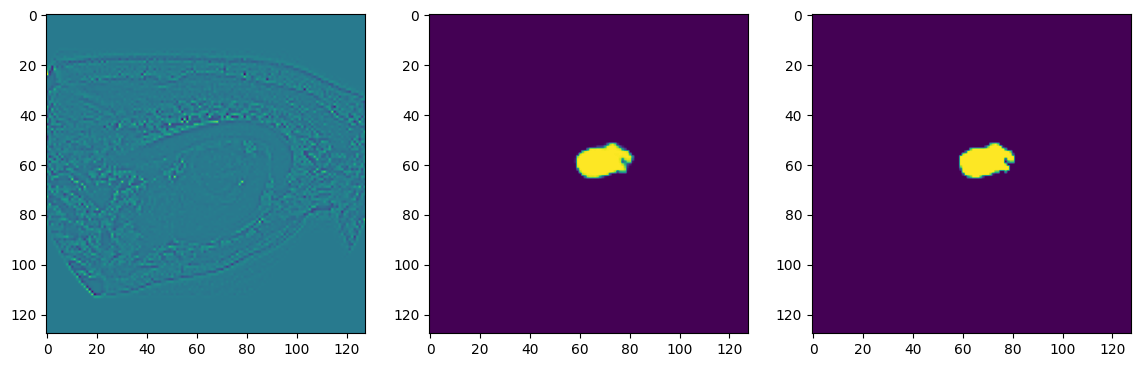

In [35]:
# Training dataset testing
figure,axis = plt.subplots(1,3,figsize=(14,14))
axis[0].imshow(X_Train[11])
axis[1].imshow(prediction_mask[0,:,:,0])
axis[2].imshow(X_label[11])